# Classification and Regression
There are two major types of supervised machine learning problems, called *classification* and *regression*.

In classification, the goal is to predict a *class label*, which is a choice from a predefined list of possibilities. In *Intro_to_Decision_Trees.ipynb* we used the example of classifying irises into one of three possible species. Classification is sometimes separated into binary classification, which is the special case of distinguishing between exactly two classes, and multiclass classification, which is classification between more than two classes. You can think of binary classification as trying to answer a yes/no question. Classifying emails as either spam or not spam is an example of a binary classification problem. In this binary classification task, the yes/no question being asked would be “Is this email spam?”

For regression tasks, the goal is to predict a *continuous number*, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

**An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of continuity in the output. If there is continuity between possible outcomes, then the problem is a regression problem.** Think about predicting annual income. There is a clear continuity in the output. Whether a person makes $40,000 or $40,001 a year does not make a tangible difference, even though these are different amounts of money; if our algorithm predicts $39,999 or $40,001 when it should have predicted $40,000, we don’t mind that much.

By contrast, for the task of recognizing the language of a website (which is a classification problem), there is no matter of degree. A website is in one language, or it is in another. There is no continuity between languages, and there is no language that is between English and French.

*Disclaimer*: Much of the code in this notebook was lifted from the excellent book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do) by Andreas Muller and Sarah Guido.

# Generalization, Overfitting, and Underfitting
In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to *generalize* from the training set to the test set. We want to build a model that is able to generalize as accurately as possible.

Usually we build a model in such a way that it can make accurate predictions on the training set. If the training and test sets have enough in common, we expect the model to also be accurate on the test set. However, there are some cases where this can go wrong. For example, if we allow ourselves to build very complex models, we can always be as accurate as we like on the training set.

The only measure of whether an algorithm will perform well on new data is the evaluation on the test set. However, intuitively we expect simple models to generalize better to new data. Therefore, we always want to find the simplest model. Building a model that is too complex for the amount of information we have, as our novice data scientist did, is called *overfitting*. Overfitting occurs when you fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data. On the other hand, if your model is too simple, then you might not be able to capture all the aspects of and variability in the data, and your model will do badly even on the training set. Choosing too simple a model is called *underfitting*.

The more complex we allow our model to be, the better we will be able to predict on the training data. However, if our model becomes too complex, we start focusing too much on each individual data point in our training set, and the model will not generalize well to new data.

There is a sweet spot in between that will yield the best generalization performance. This is the model we want to find.

# Relation of Model Complexity to Dataset Size
It’s important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. However, simply duplicating the same data points or collecting very similar data will not help.

Having more data and building appropriately more complex models can often work wonders for supervised learning tasks. In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model. Never underestimate the power of more data.

# Linear Models
Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a linear function of the input features.

## Linear Models for Regression

For regression, the general prediction formula for a linear model looks as follows:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
Here, x[0] to x[p] denotes the features (in this example, the number of features is p) of a single data point, w and b are parameters of the model that are learned, and ŷ is the prediction the model makes. For a dataset with a single feature, this is:

    ŷ = w[0] * x[0] + b
which you might remember from high school mathematics as the equation for a line. Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the slopes along each feature axis. Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of w.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled.

# Linear Regression (aka Ordinary Least Squares)
Linear regression, or *ordinary least squares* (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the *mean squared error* between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

The scikit-learn documentation on [Linear Regression]http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) has a decent basic example of its use.

## Advantages of Linear Regression (general, not specific to OLS)
* Simple to understand and to interpret, at least for a small number of features/dimensions
    * Easy to visualize for 2 or 3 features
* Very fast to train and also fast to predict
* Doesn't suffer from the *curse of dimensionality* that methods such as KNearsetNeighbors does
    * Actually linear methods tend to work better with lots of features than with a small number of features
    
## Big Disadvantage specific to OLS, but not applicable to linear regresison in general
* OLS has no way to control model complexity and can suffer from overfitting, particularly if there are a large number of features
    * Modified versions of Linear Regression such as *Ridge Regression* and *Lasso* can mitigate or fix this issue

## Disadvantages of Linear Regression in general, not specific to OLS
* In lower-dimensional spaces, other models might yield better generalization performance
* Requires more data preparation than some other techniques
    * Feature normalization is required for best results (for any algorithm which includes regularization)
    * Non-ordinal categorical features need to be one-hot encoded
    * Ordinal features need to be numerically encoded

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### A First Application:  Predicting Boston Housing Prices
One of the most famous datasets for regression in a supervised learning setting is the [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing).  It is a multivariate dataset introduced in a 1978 paper which records 13 attributes concerning housing values in the suburbs of Boston.  NOTE: The data is very, very old and the house prices are ridiculously low by today's standards.

scikit-learn has a number of small toy datasets included with it which makes it quick and easy to experiment with different machine learning algorithms on these datasets.

The [sklearn.datasets.load_boston()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) method can be used to load the this dataset.

#### Meet the data
The *boston* object that is returned by **load_boston** is a **Bunch** object, which is very similar to a dictionary.  It contains keys and values.

Feature Information:
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 

Target Information
14. MEDV: Median value of owner-occupied homes in $1000's

In [60]:
from sklearn.datasets import load_boston
boston = load_boston()

In [61]:
print("Keys of boston: {}".format(boston.keys()))

Keys of boston: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [62]:
# The value of the key DESCR is a short description of the dataset.  Here we show the beinning of the description.
print(boston['DESCR'][:193] + "\n...")

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
 
...


In [63]:
# The value of feature_names is a list of strings, giving the abbreviated name of each feature
print("Feature names: {}".format(boston['feature_names']))

Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [64]:
# The data itself is contained in the target and data fields.
# data contains the numeric measurements of features in a NumPy array
print("Type of data: {}".format(type(boston['data'])))

Type of data: <class 'numpy.ndarray'>


In [65]:
# The rows in the data array correspond to neighborhoods, while the columns represent the features
print("Shape of data: {}".format(boston['data'].shape))

Shape of data: (506, 13)


In [66]:
# We see that the array contains measurements for 506 different neighborhoods.  Here are values for the first 5.
print("First five columns of data:\n{}".format(boston['data'][:5]))

First five columns of data:
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00

In [67]:
# The target array contains the Median value of owner-occupied homes in $1000's, also as a NumPy array
print("Type of target: {}".format(type(boston['target'])))

Type of target: <class 'numpy.ndarray'>


In [68]:
# target is a one-dimensional array, with one entry per sample
print("Shape of target: {}".format(boston['target'].shape))

Shape of target: (506,)


In [69]:
# The target values are positive floating point numbers which represent a median house value in thousands of dollars.
print("Target:\n{}".format(boston['target']))

Target:
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.  

#### Measuring Success: Training and testing data
We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.  But before we can apply our model to new measurements, we need to know whether it actually works -- that is, whether we should trust its predictions.

Unfortunately, we cannot use the data we used to build the model to evaluate it.  This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set.  This "remembering" does not indicate to us whether the model will *generalize* well (in other words, whether it will also perform well on new data).

To assess the model's performance, we show it new data (data that it hasn't seen before) for which we have labels.  This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts.  One part of the data is used to build our machine learning model, and is called the *training data* or *training set*.  The rest of the data will be used to assess how well the model works; this is called the *test data*, *test set*, or *hold-out set*.

scikit-learn contains a function that shuffles the dataset and splits it for you:  the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.  This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data.  The remaining 25% of the data, together with the remaining labels, is declared as the test set.  Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but scikit-learn's default 75/25 split is a reasonable starting point.

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y.  This is inspired by the standard formulation *f(x)=y* in mathematics, where *x* is the input to a function and *y* is the output.  Following more conventions from mathematics, we use a capital *X* because the data is a two-dimensional array (a matrix) and a lowercase *y* because the target is a one-dimensional array (a vector).

Before making the split, the **train_test_split** function shuffles the dataset using a pseudorandom number generator.  If we just took the last 25% of the data as a test set, all the data points would have the label 2, as the data points are sorted by the label.

To make sure this example code will always get the same output if run multiple times, we provide the pseudorandom number generator with a fixed seed using the **random_state** parameter.

The output of the **train_test_split** function is **X_train**, **X_test**, **y_train**, and **y_test**, which are all NumPy arrays.  **X_train** contains 75% of the rows of the dataset, and **X_test** contains the remaining 25%.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

In [71]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (379, 13)
y_train shape: (379,)


In [72]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (127, 13)
y_test shape: (127,)


#### First things first: Look at your data
Before building a machine learning model, it is often a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting the data is a good way to find abnormalities and peculiarities.  Maybe some of your irises were measured using inches and not centimeters, for example.  In the real world, inconsistencies in the data and unexpected measurements are very common, as are missing data and not-a-number (NaN) or infinite values.

One of the best ways to inspect data is to visualize it. One way to do this is by using a *scatter plot*.  A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point.  Unfortunately, computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time.  It is difficult to plot datasets with more than three features this way.  One way around this problem is to do a *pair plot*, which looks at all possible pairs of features.  If you have a small number of features, such as the four we have here, this is quite reasonable.  You should keep in mind, however, that a pair plot does not show the interaction of all of the features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

In Python, the *pandas* library has a convenient function called [scatter_matrix](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#scatter-matrix-plot) for creating pair plots for a DataFrame.

In [73]:
# create dataframe from data in X_train
boston_df = pd.DataFrame(X_train, columns=boston.feature_names)

# Add in the target data
boston_df['MEDV'] = y_train

# Look at the first few rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
3,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
4,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5


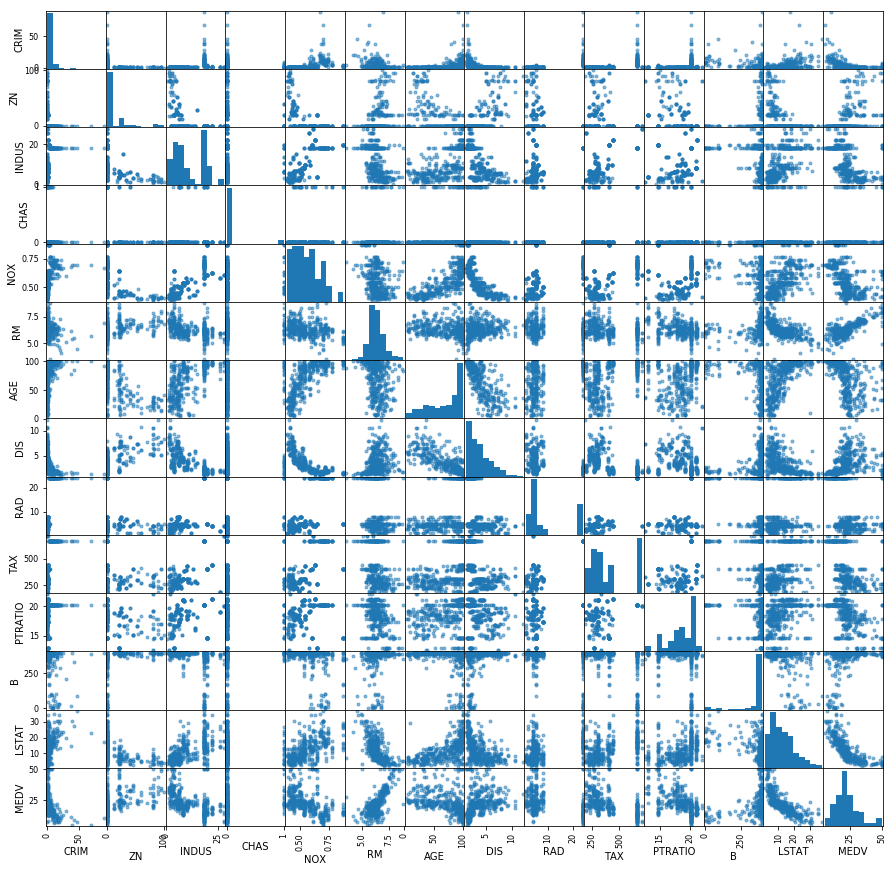

In [74]:
# create a scatter matrix from the dataframe
tmp = pd.scatter_matrix(boston_df, figsize=(15, 15))

From the plots, we can see RM has a strong positive linear relationship with MEDV and LSTAT has a strong negative one.  This makes sense - the housing price should go up as the number of rooms increases and the housing prices should go down as the percentage of lower class/income families in the neighborhood increases.

In [75]:
# Get a high-level overview of the data
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.386351,11.861478,11.083509,0.065963,0.556160,6.312683,68.735620,3.781929,9.411609,403.226913,18.489710,358.808232,12.546280,22.608707
std,8.250942,23.810122,7.021496,0.248546,0.116179,0.693391,28.214667,2.094931,8.676092,171.319579,2.191971,89.169412,7.202756,9.248455
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.075200,0.000000,5.040000,0.000000,0.449000,5.904500,45.250000,2.100350,4.000000,276.000000,17.400000,376.125000,6.700000,16.700000
50%,0.263630,0.000000,8.560000,0.000000,0.538000,6.229000,78.100000,3.215700,5.000000,329.000000,19.100000,391.930000,11.220000,21.400000
75%,3.242325,20.000000,18.100000,0.000000,0.631000,6.676000,93.800000,5.116700,24.000000,666.000000,20.200000,395.960000,17.030000,25.250000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [76]:
# Find which features are most highly correlated with the housing prices
df = boston_df
df['MEDV'] = y_train
df.corr()['MEDV']

CRIM      -0.401551
ZN         0.394188
INDUS     -0.527459
CHAS       0.155349
NOX       -0.452686
RM         0.698227
AGE       -0.412531
DIS        0.275655
RAD       -0.415387
TAX       -0.507594
PTRATIO   -0.556732
B          0.349587
LSTAT     -0.755934
MEDV       1.000000
Name: MEDV, dtype: float64

#### Building your model: Linear Regression
Now we can start building the actual machine learning model.  There are many regression algorithms in *scikit-learn* that we could use.  Here we will use Ordinary Least Squares (OLS) Linear Regression because it is easy to understand and interpret.

All machine learning models in *scikit-learn* are implemented in their own classes, which are called *Estimator* classes.  The Linear Regression algorithm is implemented in the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class in the **linear_model** module.  Before we can use the model, we need to instantiate the class into an object.  This is when we will set any parameters of the model.  The LinearRegression model doesn't have any particular parameters of importance.

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

The *lr* object encapsulates the algorithm that will be used to build the model from the training data, as well the algorithm to make predictions on new data points.  It will also hold the information that the algorithm has extracted from the training data.

To build the model on the training set, we call the **fit** method of the *lr* object, which takes as arguments the NumPy array *X_train* containing the training data and the NumPy array *y_train* of the corresponding training labels.

In [78]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [79]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -1.16869578e-01   4.39939421e-02  -5.34808462e-03   2.39455391e+00
  -1.56298371e+01   3.76145473e+00  -6.95007160e-03  -1.43520477e+00
   2.39755946e-01  -1.12937318e-02  -9.86626289e-01   8.55687565e-03
  -5.00029440e-01]
lr.intercept_: 36.980455337620576


The intercept_ attribute is always a single float number, while the coef_ attribute is a NumPy array with one entry per input feature. As we only have 13 input features in this dataset, lr.coef_ has 13 entries.

Let’s look at the training set and test set performance:

In [80]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.64


An R^2 of around 0.64 on the test set is not very good, but we can see that the scores on the training and test sets are are a decent distance apart. This means we are likely overfitting. With higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.  More complicated linear models such as *Ridge Regression* and *Lasso* have been designed to help control this overfitting problem.

An R^2 of around 0.77 on the training set is OK, but not great.  For a really good fit, we would want an R^2 of around 0.95 or so.  This tells us we are missing someting.  One possibility is we could do some feature engineering and either include polynomial powers of some of the features and/or include products of some of the features.

Also, linear models tend ot work better when all of the features exist on roughly the same scale, we could attempt to scale our data as well.

# Preprocessing and Scaling
Some algorithms, like neural networks, SVMs, and k-NearestNeighbors are very sensitive to the scaling of the data; while many others such as linear models with regularization (Ridge, Lasso, etc.) are moderately sensitive to the scaling of the data.  Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms. Often, this is a simple per-feature rescaling and shift of the data.

## Different Kinds of Preprocessing
Differnt algorithms benefit from different kinds of scaling and thus Scikit-Learn supports a variety of scaling methods, though they all have a similar API.

### StandardScaler
Neural networks expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. When using ANN, we must rescale our data so that it fulfills these requirements. For doing this automatically, *scikit-learn* has the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).  The **StandardScaler** in *scikit-learn* ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features.

### MinMaxScaler
A common rescaling method for kernel SVMs is to scale the data such that all features are between 0 and 1. We can do this in *scikit-learn* by using the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) preprocessing method.  The **MinMaxScaler** shifts the data such that all features are exactly between 0 and 1. For a two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.

### RobustScaler
Standard scaling does not ensure any particular minimum and maximum values for the features. The [RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) works similarly to the **StandardScaler** in that it ensures statistical properties for each feature that guarantee that they are on the same scale. However, the **RobustScaler** uses the median and quartiles, instead of mean and variance. This makes the **RobustScaler** ignore data points that are very different from the rest (like measurement errors). These odd data points are also called *outliers*, and can lead to trouble for other scaling techniques.


In [81]:
# Scale the boston dataset
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(boston.data)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, boston['target'], random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.64


Ordinary Least Squares (OLS) regression is not sensitive to feature scaling, but all of the regularized linear methods which help reduce the overfitting present in OLS are sensitive to feature scaling.

# Feature Engineering
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. The need for manual feature engineering can be obviated by automated feature learning.

In particular, linear models might benefit greatly from generating new features via techniques such as binning, and adding polynomials and interactions.  However, more complex models like random forests and SVMs might be able to learn more complex tasks without explicitly expanding the feature space.

In practice, the features that are used (and the match between features and method) is often the most important piece in making a machine learning approach work well.

## Interactions and Polynomials
One way to enrich a feature representation, particularly for linear models, is adding *interaction features* - products of individual original features.  Another way to enrich a feature representation is to use *polynomials* of the original features - for a given feature x, we might want to consider x^2, x^3, x^4, and so on.  This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.

Within *scikit-learn*, the addition of both *interaction features* and *polynomial features* is implemented in [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) in the **preprocessing** module.

In the code below, we modify the boston housing dataset by addig all polynomial features and interactions up to a degree of 2.  The data originally had 13 features, which were expanded into 105 interaction features. These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features. The exact correspondence between input and output features can be found using the **get_feature_names** method.

In [115]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, RobustScaler
def load_extended_boston(scaler='minmax'):
    boston = load_boston()
    X = boston.data

    if 'standard' == scaler:
        X = StandardScaler().fit_transform(boston.data)
    elif 'robust' == scaler:
        X = RobustScaler().fit_transform(boston.data)
    else:
        X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2).fit_transform(X)
    return X, boston.target

In [116]:
X, y = load_extended_boston()
X.shape

(506, 105)

In [117]:
# What if we fit this new dataset with a vastly expanded set of features using OLS?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Now the basic OLS model is doing a dramatically better job fitting the training set (R^2 of 0.95 vs 0.77).

This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is *ridge regression*, which we will look into next.

# Ridge Regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called *regularization*. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

Ridge regression is implemented in [linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). Let’s see how well it does on the extended Boston Housing dataset:

In [118]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As you can see, the training set score of Ridge is *lower* than for LinearRegression, while the test set score is *higher*. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the **alpha** parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:

In [112]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted.  For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression:

In [113]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Here, alpha=0.1 seems to be working well. We could try decreasing alpha even more to improve generalization. For now, notice how the parameter alpha corresponds to the model complexity. 

Very shortly we need to think about systematic methods for properly select optimal values for parameters such as **alpha**.

We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha. A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha. This is confirmed in the plot below:

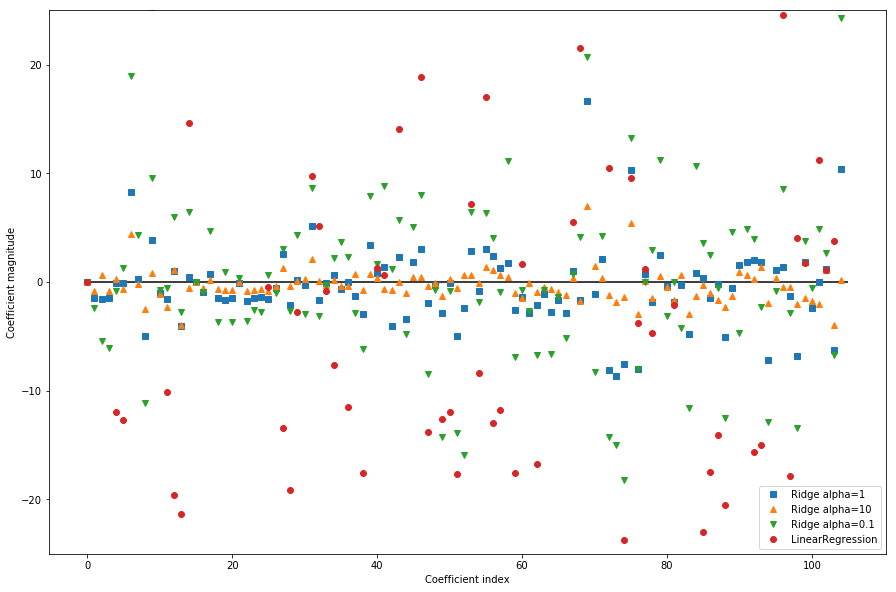

In [114]:
plt.figure(figsize=(15, 10))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

Clearly, the interactions and polynomial features gave us a good boost in performance when using Ridge. When using a more complex model like a random forest, the story can be a bit different, though.  Adding features will benefit linear models the most.  For very complex models, adding features may actually slightly decrease the performance.

Machine learning is complex.  Often you have to try several experiments and just see what works best.

# Model Evaluation and Improvement
To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the **train_test_split function**, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples and for regression computes the R^2.

Remember, the reason we split our data into training and test sets is that we are interested in measuring how well our model *generalizes* to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.

As we saw when exploring Ridge regression, we need a more robust way to assess generalization performance which is capable of automatically choosing optimal values for hyper-parameters such as **alpha**.

## Cross-Validation
*Cross-validation* is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross-validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is *k-fold cross-validation*, where *k* is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called *folds*. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the accuracy. In the end, we have collected five accuracy values.

Usually, the first fifth of the data is the first fold, the second fifth of the data is the second fold, and so on.

The whole point of cross-validation is to be more robust than a simple train/test split so that the results are not likely to be influenced by a particularly good or bad split of the data.  The main disadvantage is that it requires more computation.

### Cross-Validation in scikit-learn
Cross-validation is implemented in scikit-learn using the [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) function from the *model_selection* module. The parameters of the **cross_val_score** function are the model we want to evaluate, the training data, and the ground-truth labels.

In [130]:
# Let's evaluate cross-validation on the iris dataset using logistic regression (which is actually classification)
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


By default, cross_val_score performs three-fold cross-validation, returning three accuracy values. We can change the number of folds used by changing the cv parameter:

In [131]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


A common way to summarize the cross-validation accuracy is to compute the mean:

In [132]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


Using the mean cross-validation we can conclude that we expect the model to be around 96% accurate on average. Looking at all five scores produced by the five-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could imply that the model is very dependent on the particular folds used for training, but it could also just be a consequence of the small size of the dataset.

### Benefits of Cross-Validation
There are several benefits to using cross-validation instead of a single split into a training and a test set. First, remember that train_test_split performs a random split of the data. Imagine that we are “lucky” when randomly splitting the data, and all examples that are hard to classify end up in the training set. In that case, the test set will only contain “easy” examples, and our test set accuracy will be unrealistically high. Conversely, if we are “unlucky,” we might have randomly put all the hard-to-classify examples in the test set and consequently obtain an unrealistically low score. However, when using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset. For the iris dataset, we saw accuracies between 90% and 100%. This is quite a range, and it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data.

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more a single split of the data is that we use our data more effectively. When using train_test_split, we usually use 75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models.

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data.

It is important to keep in mind that cross-validation is not a way to build a model that can be applied to new data. Cross-validation does not return a model. When calling cross_val_score, multiple models are built internally, but the purpose of cross-validation is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.

# Stratified k-Fold Cross-Validation and Other Strategies
Splitting the dataset into k folds by starting with the first one-k-th part of the data, as described in the previous section, might not always be a good idea. For example, let’s have a look at the boston housing dataset:

In [141]:
lr = LinearRegression()
scores = cross_val_score(lr, boston.data, boston.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.5828011   0.53193819 -5.85104986]


As we can see, a default 3-fold cross-validation performed ok for the first two folds, but horribly bad for the third one.  

The fundamental problem here is that if that data isn't organized in a random way, then just taking folds in order doesn't represent a random sampling for each fold.  There are multiple possible ways to mitigate this issue.

### Stratified k-Fold Cross-Validation
As the simple k-fold strategy would obviously fail for classification problems if the data is organized by target category, *scikit-learn* does not use it for classification, but rather uses *stratified k-fold cross-validation*. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

*scikit-learn* supports startified k-fold cross-validation via the [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) class in the *model_selection* module.

For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.

For regression, *scikit-learn* uses the standard k-fold cross-validation by default.

### Shuffle-split cross-validation
Another, very flexible strategy for cross-validation is *shuffle-split cross-validation*. In shuffle-split cross-validation, each split samples **train_size** many points for the training set and **test_size** many (disjoint) point for the test set. This splitting is repeated **n_iter** times. You can use integers for **train_size** and **test_size** to use absolute sizes for these sets, or floating-point numbers to use fractions of the whole dataset.

Since the sampling in *shuffle-split cross-validation* is done in a random fashion, this is a safer alternative to default *k-Fold Cross-Validation* when the data isn't truly randomized.

*scikit-learn* supports shuffle-split cross-validation via the [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) class in the *model_selection* module.

There is also a stratified variant of ShuffleSplit, aptly named [StratifiedShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit), which can provide more reliable results for classification tasks.

In [143]:
# Let's look at the boston housing dataset again using shuffle-split cross-validation to ensure random sampling
# The following code splits the dataset into 80% training set and 20% test set for 3 iterations:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.8, train_size=.2, n_splits=3)
scores = cross_val_score(lr, boston.data, boston.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.70144848  0.72178729  0.6940545 ]


## Grid Search
Now that we know how to evaluate how well a model generalizes, we can take the next step and improve the model’s generalization performance by tuning its parameters. We discussed the parameter settings of the Ridge model for ridge regression earlier. Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task, but necessary for almost all models and datasets. Because it is such a common task, there are standard methods in *scikit-learn* to help you with it. The most commonly used method is grid search, which basically means trying all possible combinations of the parameters of interest.

Consider the case of ridge regression, as implemented in the Ridge class. As we discussed earlier, there is one important parameters: the regularization parameter, *alpha*. Say we want to try the values 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, and 100 for *alpha*. Because we have eleven different settings for *alpha* and *alpha* is the only parameter, we have 11 combinations of parameters in total. Looking at all possible combinations creates a table (or grid) of parameter settings for the Ridge regression model.

### Simple Grid Search
We can implement a simple grid search just as a for loop over the parameter, training and evaluating a classifier for each value:

In [158]:
X, y = load_extended_boston(scaler='standard')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for alpha in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]:
    # for each combination of parameters, train an SVC
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = ridge.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 379   size of test set: 127
Best score: 0.78
Best parameters: {'alpha': 50}


### The Danger of Overfitting the Parameters and the Validation Set
Given this result, we might be tempted to report that we found a model that performs with 78% accuracy on our dataset. However, this claim could be overly optimistic (or just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily carry over to new data. Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. This is the same reason we needed to split the data into training and test sets in the first place; we need an independent dataset to evaluate, one that was not used to create the model.

One way to resolve this problem is to split the data again, so we have three sets: the training set to build the model, the validation (or development) set to select the parameters of the model, and the test set to evaluate the performance of the selected parameters. 

After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data. This way, we can use as much data as possible to build our model. This leads to the following implementation:

In [164]:
X, y = load_extended_boston(scaler='standard')
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for alpha in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]:
    # for each combination of parameters, train an SVC
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = ridge.score(X_valid, y_valid)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 284   size of validation set: 95   size of test set: 127

Best score on validation set: 0.92
Best parameters:  {'alpha': 50}
Test set score with best parameters: 0.78


The best score on the validation set is 92%. However, the score on the test set—the score that actually tells us how well we generalize—is lower, at 78%. So we can claim to classify new data 78% correctly.  This happens to be the same as before, now we can make a stronger claim since the final test set wasn't used in any way shape or form during hyper-parameter tuning.

The distinction between the training set, validation set, and test set is fundamentally important to applying machine learning methods in practice. Any choices made based on the test set accuracy “leak” information from the test set into the model. Therefore, it is important to keep a separate test set, which is only used for the final evaluation. It is good practice to do all exploratory analysis and model selection using the combination of a training and a validation set, and reserve the test set for a final evaluation—this is even true for exploratory visualization. Strictly speaking, evaluating more than one model on the test set and choosing the better of the two will result in an overly optimistic estimate of how accurate the model is.